## CS 181 Practical, Spring 2021
Starter Code written by njohnson

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
!gsutil cp gs://cs181_practical_data/Xtrain_amp.npy ./
!gsutil cp gs://cs181_practical_data/ytrain_amp.npy ./

!gsutil cp gs://cs181_practical_data/Xtest_amp.npy ./
!gsutil cp gs://cs181_practical_data/ytest_amp.npy ./

!gsutil cp gs://cs181_practical_data/Xtrain_mel.npy ./
!gsutil cp gs://cs181_practical_data/ytrain_mel.npy ./

!gsutil cp gs://cs181_practical_data/Xtest_mel.npy ./
!gsutil cp gs://cs181_practical_data/ytest_mel.npy ./

In [ ]:
X_amp_train = np.load("Xtrain_amp.npy")
y_amp_train = np.load("ytrain_amp.npy")
X_amp_test = np.load("Xtest_amp.npy")
y_amp_test = np.load("ytest_amp.npy")
X_mel_train = np.load("Xtrain_mel.npy")
y_mel_train = np.load("ytrain_mel.npy")
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_test = np.load("Xtest_mel.npy")
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)
y_mel_test = np.load("ytest_mel.npy")

In [ ]:
# Amp PCA 
pca = make_pipeline(StandardScaler(with_std=False), PCA(n_components=500))
X_amp_train_lowdim = pca.fit_transform(X_amp_train)
X_amp_test_lowdim = pca.transform(X_amp_test)

In [ ]:
# Amp Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_amp_train_lowdim, y_amp_train)
train_preds = lr.predict(X_amp_train_lowdim)
print(f"Train Accuracy: {np.mean(train_preds == y_amp_train)}")
test_preds = lr.predict(X_amp_test_lowdim)
print(f"Test Accuracy: {np.mean(test_preds == y_amp_test)}")

Train Accuracy: 0.41707185305240413
Test Accuracy: 0.1943559399180701


In [ ]:
# Mel PCA 
mel_pca = make_pipeline(StandardScaler(with_std=False), PCA(n_components=500))
X_mel_train_lowdim = mel_pca.fit_transform(X_mel_train_flat)
X_mel_test_lowdim = mel_pca.transform(X_mel_test_flat)

In [ ]:
# Mel Logistic Regression
mel_lr = LogisticRegression(max_iter=500)
mel_lr.fit(X_mel_train_lowdim, y_mel_train)
mel_train_preds = mel_lr.predict(X_mel_train_lowdim)
print(f"Train Accuracy: {np.mean(mel_train_preds == y_mel_train)}")
mel_test_preds = mel_lr.predict(X_mel_test_lowdim)
print(f"Test Accuracy: {np.mean(mel_test_preds == y_mel_test)}")

Train Accuracy: 0.7129479560597876
Test Accuracy: 0.30951297223486574


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Amp RandomForest
rf = RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
rf.fit(X_amp_train, y_amp_train)
rf_train_preds = rf.predict(X_amp_train)
print("Train Accuracy: ", np.mean(rf_train_preds == y_amp_train))
rf_test_preds = rf.predict(X_amp_test)
print("Test Accuracy: ", np.mean(rf_test_preds == y_amp_test))

Train Accuracy:  0.8598955519538988
Test Accuracy:  0.2753755120619026


In [ ]:
# Amp PCA and RandomForest
pca_rf = RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
pca_rf.fit(X_amp_train_lowdim, y_amp_train)
pca_rf_train_preds = pca_rf.predict(X_amp_train_lowdim)
print("Train Accuracy: ", np.mean(pca_rf_train_preds == y_amp_train))
pca_rf_test_preds = pca_rf.predict(X_amp_test_lowdim)
print("Test Accuracy: ", np.mean(pca_rf_test_preds == y_amp_test))

Train Accuracy:  0.7154691157932649
Test Accuracy:  0.25534820209376424


In [ ]:
# Mel RandomForest
mel_rf = RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
mel_rf.fit(X_mel_train_flat, y_mel_train)
mel_rf_train_preds = mel_rf.predict(X_mel_train_flat)
print("Train Accuracy: ", np.mean(mel_rf_train_preds == y_mel_train))
mel_rf_test_preds = mel_rf.predict(X_mel_test_flat)
print("Test Accuracy: ", np.mean(mel_rf_test_preds == y_mel_test))

Train Accuracy:  0.9538987934449847
Test Accuracy:  0.46745562130177515


In [ ]:
# Mel PCA and RandomForest
mel_pca_rf = RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
mel_pca_rf.fit(X_mel_train_lowdim, y_mel_train)
mel_pca_rf_train_preds = mel_pca_rf.predict(X_mel_train_lowdim)
print("Train Accuracy: ", np.mean(mel_pca_rf_train_preds == y_mel_train))
mel_pca_rf_test_preds = mel_pca_rf.predict(X_mel_test_lowdim)
print("Test Accuracy: ", np.mean(mel_pca_rf_test_preds == y_mel_test))

Train Accuracy:  0.9245452908337836
Test Accuracy:  0.3900773782430587


In [ ]:
# Mel RandomForest Class Accuracies
for i in range(10):
    train_preds = mel_rf.predict(X_mel_train_flat[y_mel_train == i])
    print(f"Train Accuracy for Class {i}: {np.mean(train_preds == i)}")
    test_preds = mel_rf.predict(X_mel_test_flat[y_mel_test == i])
    print(f"Test Accuracy for Class {i}: {np.mean(test_preds == i)}")

Train Accuracy for Class 0: 0.97
Test Accuracy for Class 0: 0.35333333333333333
Train Accuracy for Class 1: 0.9035532994923858
Test Accuracy for Class 1: 0.20512820512820512
Train Accuracy for Class 2: 0.9468390804597702
Test Accuracy for Class 2: 0.5719063545150501
Train Accuracy for Class 3: 0.9024856596558317
Test Accuracy for Class 3: 0.4104803493449782
Train Accuracy for Class 4: 0.957166392092257
Test Accuracy for Class 4: 0.553030303030303
Train Accuracy for Class 5: 0.9805825242718447
Test Accuracy for Class 5: 0.4356060606060606
Train Accuracy for Class 6: 1.0
Test Accuracy for Class 6: 0.23333333333333334
Train Accuracy for Class 7: 0.9726443768996961
Test Accuracy for Class 7: 0.461864406779661
Train Accuracy for Class 8: 0.9580838323353293
Test Accuracy for Class 8: 0.4745762711864407
Train Accuracy for Class 9: 0.94
Test Accuracy for Class 9: 0.53


In [ ]:
# Train Mel RF Classifiers with Different Max Depths
depths = [2, 4, 6, 8, 10, 12, 14]
train_accuracies = []
test_accuracies = []
models = []

for d in depths:
    model = RandomForestClassifier(n_estimators=500, max_depth=d, n_jobs=-1)
    model.fit(X_mel_train_flat, y_mel_train)
    models.append(model)

    train_accuracy = np.mean(model.predict(X_mel_train_flat) == y_mel_train)
    train_accuracies.append(train_accuracy)
    print(f"Train Accuracy for Max Depth {d}: {train_accuracy}")

    test_accuracy = np.mean(model.predict(X_mel_test_flat) == y_mel_test)
    test_accuracies.append(test_accuracy)
    print(f"Test Accuracy for Max Depth {d}: {test_accuracy}")

Train Accuracy for Max Depth 2: 0.31820637493246895
Test Accuracy for Max Depth 2: 0.2872098315885298
Train Accuracy for Max Depth 4: 0.49432739059967584
Test Accuracy for Max Depth 4: 0.38188438780154754
Train Accuracy for Max Depth 6: 0.6828741220961643
Test Accuracy for Max Depth 6: 0.4283113336367774
Train Accuracy for Max Depth 8: 0.8467495047721952
Test Accuracy for Max Depth 8: 0.45607646791078743
Train Accuracy for Max Depth 10: 0.9524581307401405
Test Accuracy for Max Depth 10: 0.46700045516613564
Train Accuracy for Max Depth 12: 0.9882946155231407
Test Accuracy for Max Depth 12: 0.48475193445607645
Train Accuracy for Max Depth 14: 0.9972987574284171
Test Accuracy for Max Depth 14: 0.47792444242148385


In [ ]:
# Class Accuracies
class_accuracies = dict()
for i, d in enumerate(depths):
    model = models[i]
    class_train_accuracies = []
    class_test_accuracies = []
    for k in range(10):
        train_accuracy = np.mean(model.predict(X_mel_train_flat[y_mel_train == k]) == k)
        class_train_accuracies.append(train_accuracy)

        test_accuracy = np.mean(model.predict(X_mel_test_flat[y_mel_test == k]) == k)
        class_test_accuracies.append(test_accuracy)
    class_accuracies[d] = {'Train': class_train_accuracies, 'Test': class_test_accuracies}

In [ ]:
train_arr = np.array([class_accuracies[d]['Train'] for d in depths[::-1]])
test_arr = np.array([class_accuracies[d]['Test'] for d in depths[::-1]])

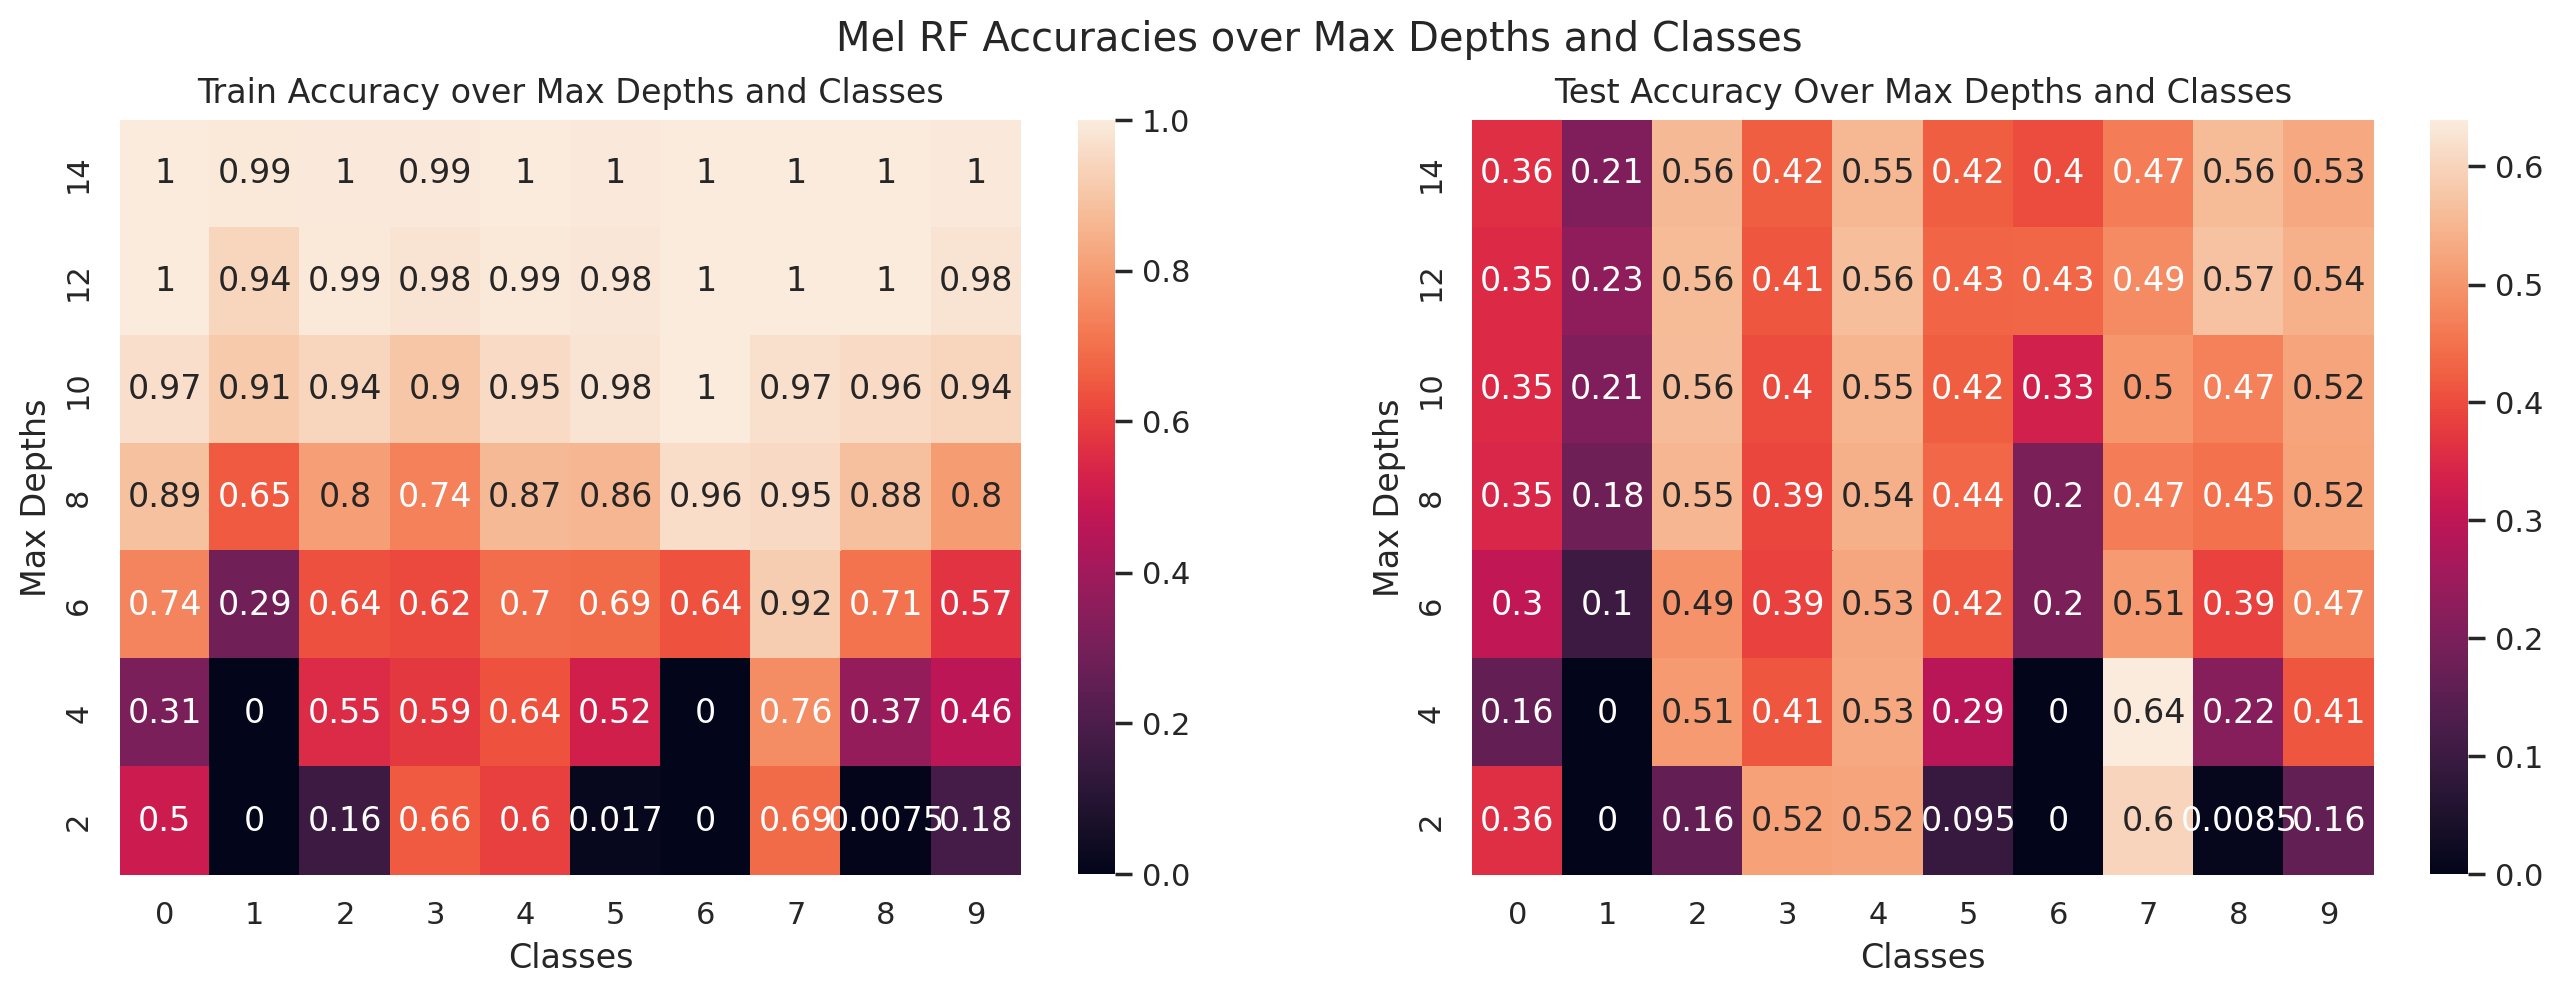

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(16, 5), dpi=200)
ax[0].set_title("Train Accuracy over Max Depths and Classes")
ax[1].set_title("Test Accuracy Over Max Depths and Classes")
h1 = sns.heatmap(data = train_arr, ax = ax[0], yticklabels = depths[::-1], annot = True)
h2 = sns.heatmap(data = test_arr, ax = ax[1], yticklabels = depths[::-1], annot = True)
h1.set_xlabel("Classes")
h1.set_ylabel("Max Depths")
h2.set_xlabel("Classes")
h2.set_ylabel("Max Depths")
plt.suptitle("Mel RF Accuracies over Max Depths and Classes")
plt.show()

In [ ]:
# Get accuracies for max_depth graph below
max_depths = np.linspace(1, 22, 10, endpoint=True)
train_acc = []
test_acc = []

for depth in max_depths:
    model = RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=-1, min_samples_split=int(split))
    model.fit(X_mel_train_flat, y_mel_train)

    # make our predictions
    rf_preds = model.predict(X_mel_train_flat)
    train_acc.append(np.mean(rf_preds == y_mel_train))
    print(np.mean(rf_preds == y_mel_train))

    rf_preds = model.predict(X_mel_test_flat)
    test_acc.append(np.mean(rf_preds == y_mel_test))
    print(np.mean(rf_preds == y_mel_test))


0.9992796686475779
0.4802002730996814
0.9830722132180804
0.4829312699135184
0.952638213578246
0.4729176149294492
0.9223842967765172
0.46791078743741465
0.8984332793084819
0.4720072826581702
0.87394201332613
0.46700045516613564
0.8492706645056726
0.4651797906235776
0.8273005582567982
0.45880746472462447
0.8119935170178282
0.45744196631770595
0.7927246533405367
0.45106964041875286


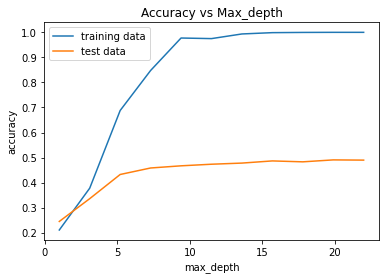

In [ ]:
# Plot accuracies across max_depth hyperparameter values
plt.plot(np.linspace(1,22,11), train_acc, label="training data")
plt.plot(np.linspace(1,22,11), test_acc, label="test data")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Accuracy vs Max_depth")
plt.legend()
plt.show()